In [1]:
import numpy as np
import matplotlib.pyplot as plt
from thermals.thermal_system import ThermalSystem


In [2]:
sim_dur = 3600 # simulation duration in s

C_eff = 5000 # Effective heat capacity in J/K (equivalent to mass*specific_heat_capacity)
hA_eff = 10 # Effective thermal conductance in W/K
T_inf = 298.15 # Ambient temperature
P_heat = 100 # Internal heat release
T_0 = [T_inf, T_inf] # characteristic temperature T in K


system = ThermalSystem([C_eff, np.inf], node_labels=['object', 'air'])
system.add_heat_source('object', P_heat)
system.add_convective_contact('object', 'air', hA_eff, 1)
t, T = system.integrate(T_0, sim_dur)

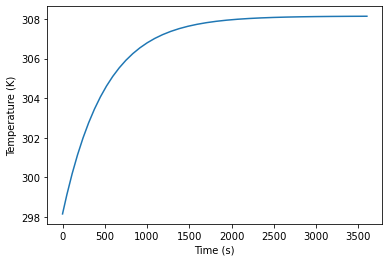

In [3]:
C_1, P_1,A_1 = 5000, 100, 0.5
C_2, P_2, A_2 = 3000, 30, 0.3

# source1, source2, internal air, internal wall, external wall, external air
cv_air = 718  # J/kgK
rho_air = 1.225  # kg/m^3
air_volume = 2  # m^3
h = 12.12  # W/m^2K (https://www.engineeringtoolbox.com/convective-heat-transfer-d_430.html)

C_wall = 20 * 160  # J/K for 20 kg of lead (http://www2.ucdsb.on.ca/tiss/stretton/database/Specific_Heat_Capacity_Table.html)
A_wall = 3  # m^2


system = ThermalSystem([C_1, C_2, cv_air * rho_air * air_volume, C_wall, np.inf],
                        ['source', 'motors', 'internal air', 'wall', 'external air'])
system.add_heat_source('source', P_1)
# system.add_conductive_contact('source', 'wall', 36.6, A_1, 0.05)
system.add_convective_contact('source', 'internal air', h, A_1)
system.add_heat_source('motors', P_2)
system.add_convective_contact('motors', 'internal air', h, A_2)
system.add_convective_contact('wall', 'internal air', h, A_wall)
system.add_convective_contact('wall', 'external air', h, A_wall)

t, T = system.integrate(25, 5 * 3600)

In [ ]:
for i, name in enumerate(system.node_labels):
    plt.plot(t / 3600, T[i, :], label=name)
plt.legend()
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')
plt.show()

# 200W, 20min-30min, liquid cooled, 22-32C
# Brian, scott get thermal census